# Exploratory Data Analysis
## Notebook Content:
- EDA: Quick glance (graphs, correlation matrix) -> To understand the data.

## 1. Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

## 2.0 First date

### 2.1 Load data

In [11]:
df = pd.read_csv('../data/raw/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.2 General information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2.3 Statistical summary of the figures

In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 3.0 EDA

### 3.1 Distribution of target variables (charges)

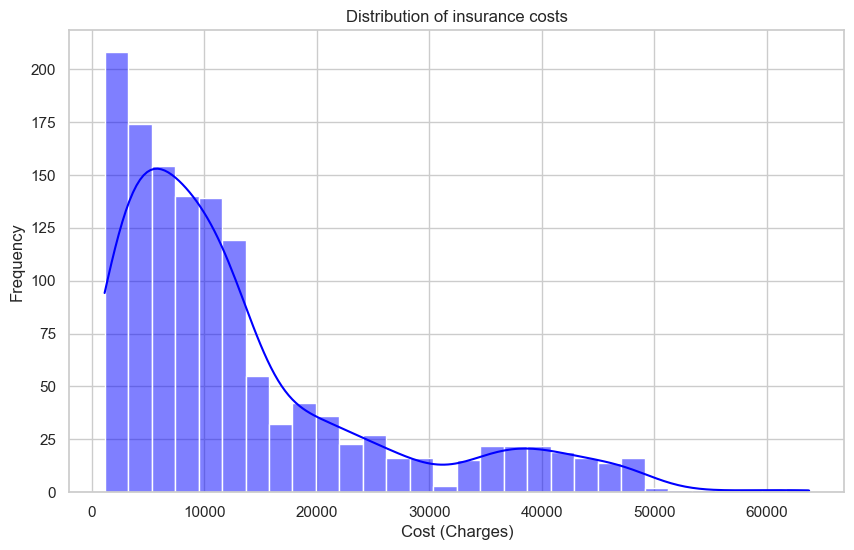

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of insurance costs')
plt.xlabel('Cost (Charges)')
plt.ylabel('Frequency')
plt.show()

We can say most of the people have low carges, but there is a small group who has very high charges.

### 3.2 Examination of categorical variables

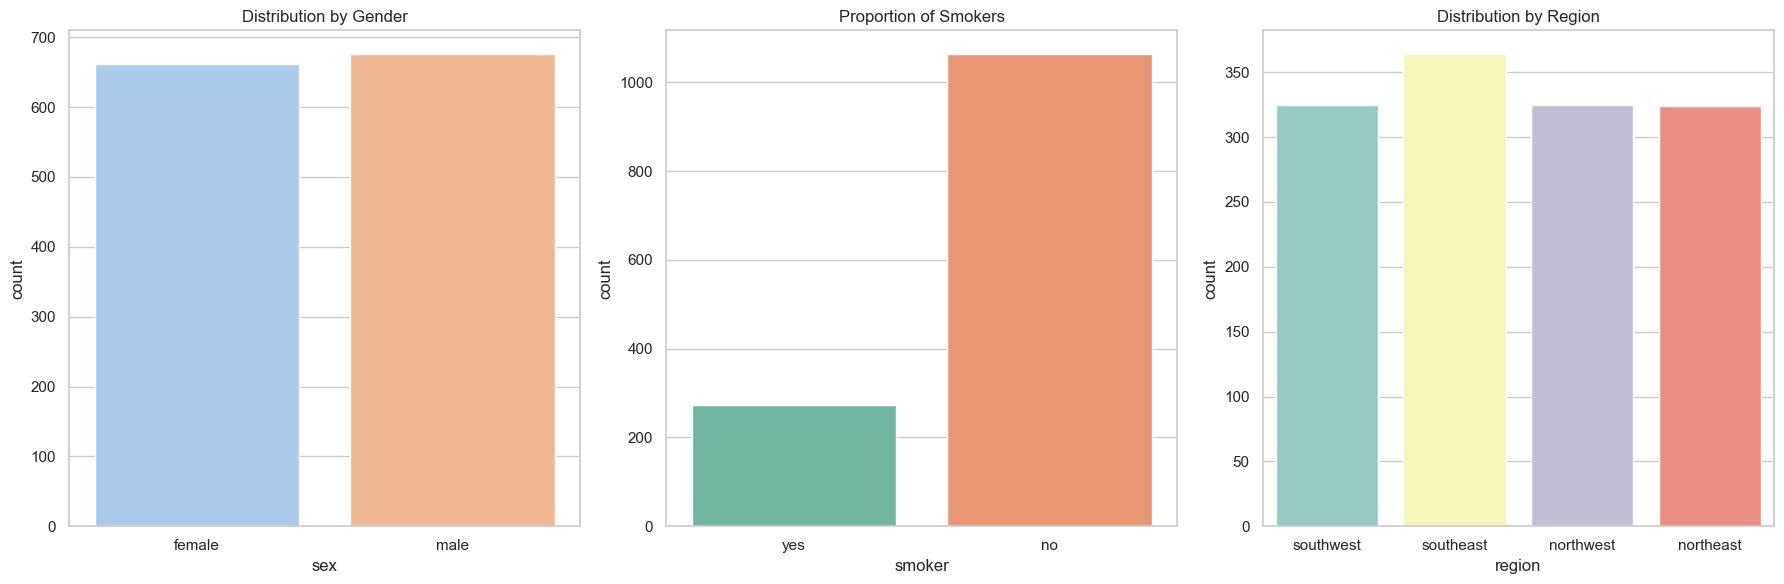

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='sex', data=df, ax=axes[0], palette='pastel', hue='sex', legend=False)
axes[0].set_title('Distribution by Gender')

sns.countplot(x='smoker', data=df, ax=axes[1], palette='Set2', hue='smoker', legend=False)
axes[1].set_title('Proportion of Smokers')

sns.countplot(x='region', data=df, ax=axes[2], palette='Set3', hue='region', legend=False)
axes[2].set_title('Distribution by Region')

plt.tight_layout()
plt.show()

### 3.3 Bivariate Analysis

#### The impact of smoking on costs

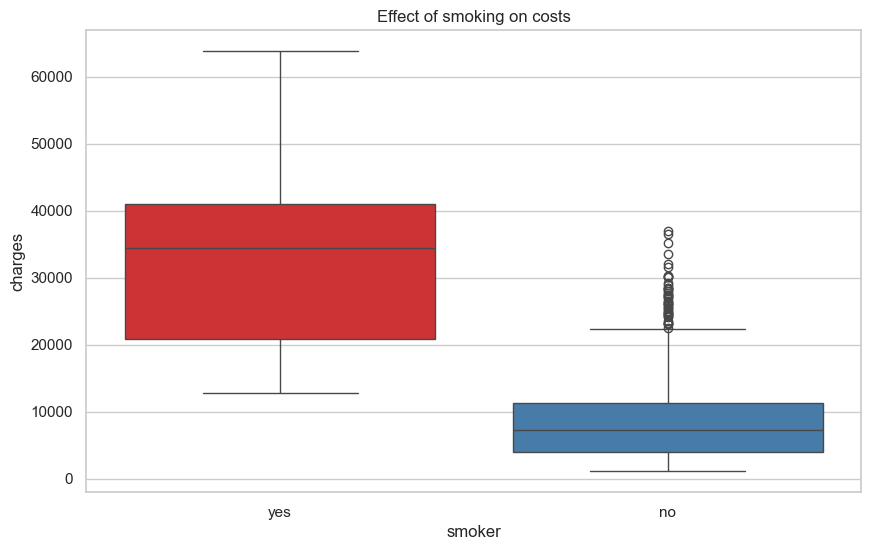

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set1')
plt.title('Effect of smoking on costs')
plt.show()

#### Effect of age and BMI on costs

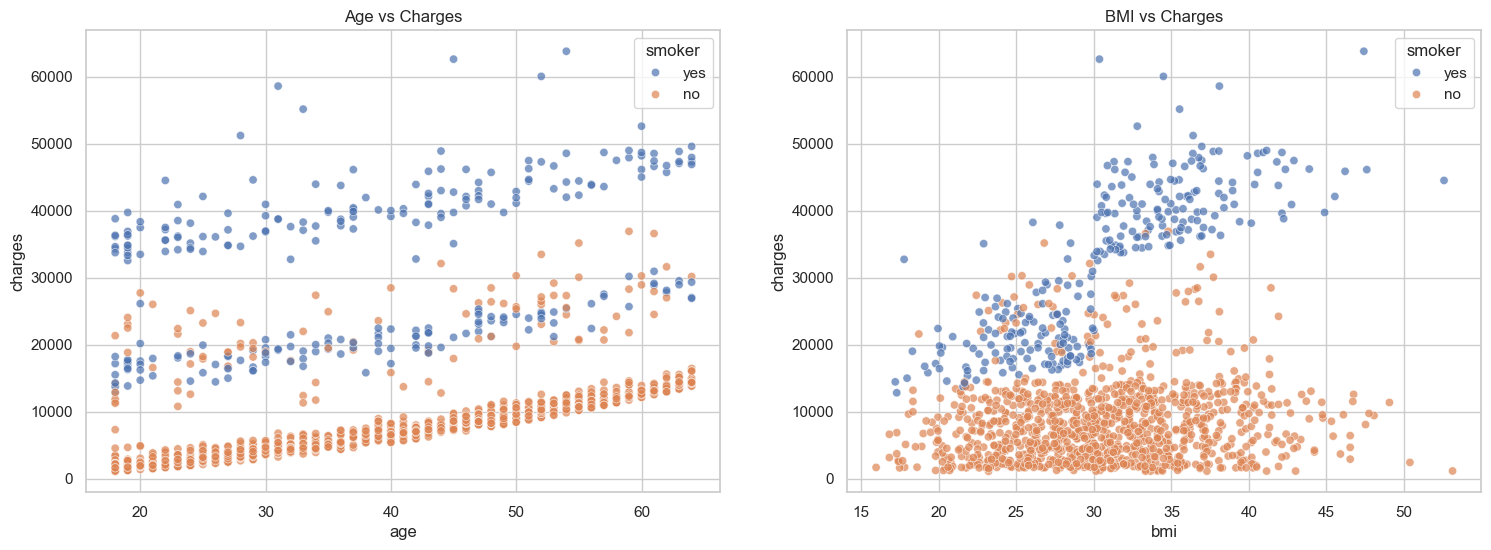

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Age vs Charges
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, ax=axes[0], alpha=0.7)
axes[0].set_title('Age vs Charges')

# BMI vs Charges
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, ax=axes[1], alpha=0.7)
axes[1].set_title('BMI vs Charges')

plt.show()

### 3.4 Correlation Matrix

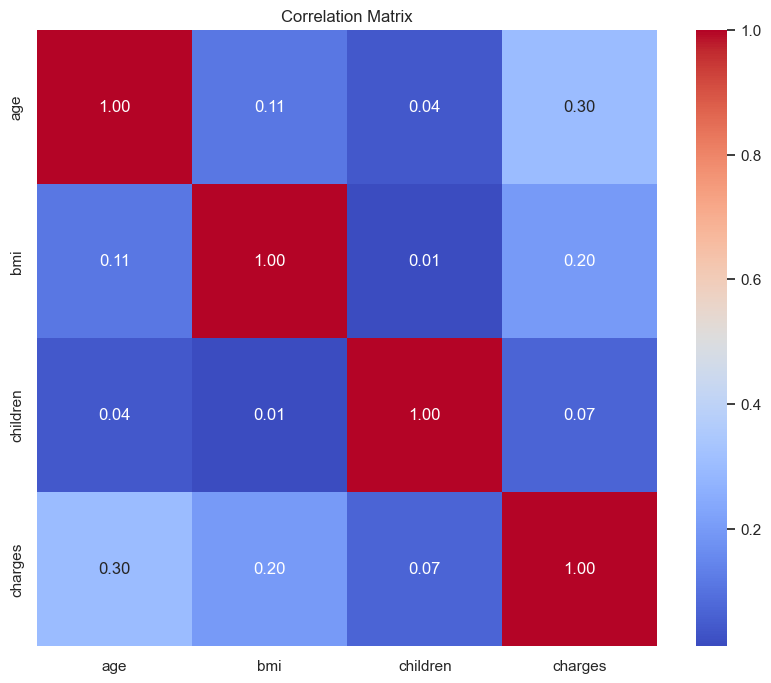

In [18]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()